# First Deep Learning Project in Python with Keras

The steps we are going to cover:
1. Dependancies installation
2. Load Data.
3. Define Keras Model.
4. Compile Keras Model.
5. Fit Keras Model.
6. Evaluate Keras Model.
7. Put It All Together.
8. Make Predictions

## Dependancies installation

In [55]:
# try:
#     import google.colab
#     IN_COLAB = True
# except ImportError:
#     IN_COLAB = False

# if IN_COLAB:
#     # Installer toutes les librairies nécessaires
#     !pip install tensorflow numpy pandas scikit-learn matplotlib seaborn
# else:
#     print("""In the environment you created for this module, install the required dependencies.
# For example:
#     conda create --name ML5 python=3.11
#     conda activate ML5
#     conda install jupyter tensorflow numpy pandas scikit-learn matplotlib seaborn""")


## Load Data
    

In [56]:
# if IN_COLAB:
#   from google.colab import files
#   uploaded = files.upload()

Download the dataset and place it in your local working directory, the same location as your python file. Take a look at the dataset:

In [57]:
import pandas as pd
df = pd.read_csv('./Data/housepricedata(1).csv')

Here, you can explore the data a little. We have our input features in the first ten columns:

- Lot Area (in sq ft)
- Overall Quality (scale from 1 to 10)
- Overall Condition (scale from 1 to 10)
- Total Basement Area (in sq ft)
- Number of Full Bathrooms
- Number of Half Bathrooms
- Number of Bedrooms above ground
- Total Number of Rooms above ground
- Number of Fireplaces
- Garage Area (in sq ft)

In our last column, we have the feature that we would like to predict:
- Is the house price above the median or not? (1 for yes and 0 for no)

Which task are we going to train the neural network for (regression, classification, other...) ?

In [58]:
# Your answer here : classification 

Now that we’ve seen what our data looks like, we want to convert it into arrays for our machine to process:

In [59]:
dataset = df.values

Split the dataset into input features (X) and the feature we wish to predict (Y). To do that split, assign the first 10 columns of our array to a variable called X and the last column of our array to a variable called Y

In [60]:
X = dataset[:,0:10]
y = dataset[:,10]

Now, we want to split our dataset into a training set, a validation set and a test set. These are the dimensions you need to get for your train, validation and test datasets: (1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)

We will use the code from scikit-learn called ‘train_test_split’, which as the name suggests, split our dataset into a training set and a test set. We first import the code we need:

In [61]:
# splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=219, random_state=42)



Unfortunately, this function only helps us split our dataset into two. Since we want a separate validation set and test set, we can use the same function to do the split again on val_and_test:

In [62]:

#splitting into validation and test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=219, random_state=42)

Feature scaling will help us see all the variables from the same scale, it will also help our models learn faster

In [63]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

## Define Keras Model.

The first thing we have to do is to set up the architecture. Let’s first think about what kind of neural network architecture we want. Suppose we want this neural network:
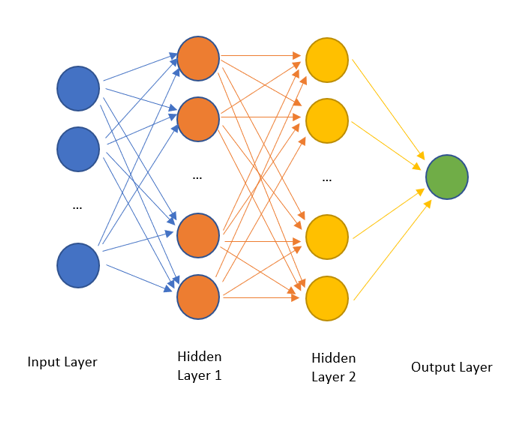  
In words, we want to have these layers:

- Hidden layer 1: 12 neurons, ReLU activation
- Hidden layer 2: 16 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation
    
Now, we need to describe this architecture to Keras. We will be using the Sequential model, which means that we merely need to describe the layers above in sequence.

In [74]:
# Dependencies
import keras
from keras.models import Sequential

from keras.layers import Dense

# define model
model = keras.Sequential(
    [
        Dense(12, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(1, activation= 'sigmoid', name="layer3"),
    ]
)



Now that the model is defined, we can compile it.

Compiling the model uses TensorFlow that chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.

In [75]:
# compile model
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

We have defined our model and compiled it ready for efficient computation.

Now it is time to execute the model on some data (use 100 iterations and 32 batch size).

In [66]:
# train model
model.fit(X_train_scaled, y_train, batch_size = 32, epochs=10)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5088 - loss: 0.2351   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5616 - loss: 0.2171 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6781 - loss: 0.2021 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7671 - loss: 0.1895 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8151 - loss: 0.1791 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8376 - loss: 0.1703 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8395 - loss: 0.1628 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8454 - loss: 0.1564 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8483 - loss: 0.1507 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8493 - loss: 0.1457 


In [67]:
# predict on validation set
y_pred_val = model.predict(X_val_scaled, batch_size = 32)

y_pred_val = (y_pred_val>0.5).astype(int)




7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [68]:
# calculate accuracy on validation set
from sklearn.metrics import accuracy_score

accuracy_score(y_val, y_pred_val)

0.8584474885844748

We have trained our model, which gives us a correct accuracy. But we haven't used our validation set properly, and our test set at all. Let's correct that.

In [ ]:
# train model
history = model.fit(X_train_scaled, y_train, validation_data=[X_val_scaled, y_val], batch_size = 32, epochs=100)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3258 - loss: 0.2793 - val_accuracy: 0.3562 - val_loss: 0.2612
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3816 - loss: 0.2554 - val_accuracy: 0.4155 - val_loss: 0.2407
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4687 - loss: 0.2372 - val_accuracy: 0.5251 - val_loss: 0.2255
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5450 - loss: 0.2232 - val_accuracy: 0.6438 - val_loss: 0.2135
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6399 - loss: 0.2119 - val_accuracy: 0.6849 - val_loss: 0.2039
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7250 - loss: 0.2027 - val_accuracy: 0.7397 - val_loss: 0.1958
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7877 - loss: 0.1947 - val_accuracy: 0.7991 - val_loss: 0.1888
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8102 - loss: 0.1877 - val_accuracy: 0.8128 - v

In [79]:
# predict on TEST set
y_pred_test = model.predict(X_test_scaled, batch_size = 32)

y_pred_test = (y_pred_test>0.5).astype(int)


# calculate accuracy on test set
accuracy_score(y_test, y_pred_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


0.908675799086758

Visualize training and validation losses and accuracies plots with the help of keras

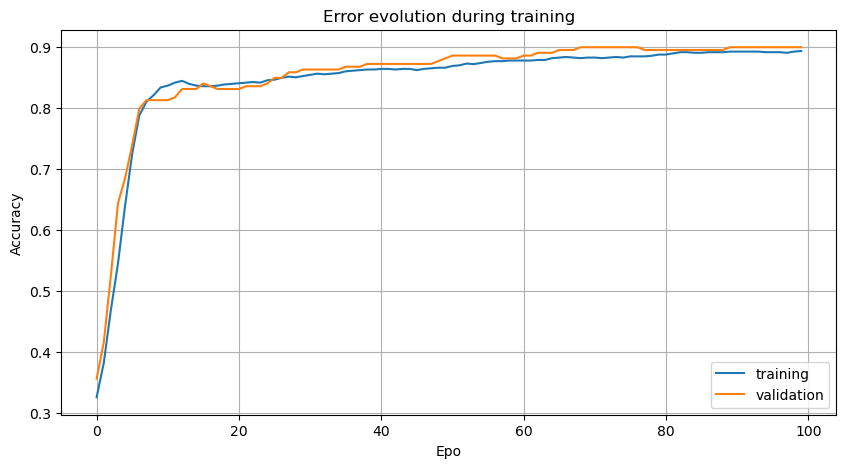

In [78]:
# visualize training and validation accuracies
import matplotlib.pyplot as plt
# Visualization of error evolution
plt.figure(figsize=(10, 5))
plt.plot(history.history["accuracy"],label = "training" )
plt.plot(history.history["val_accuracy"],label = "validation" )
plt.grid(True)
plt.xlabel('Epo')
plt.ylabel('Accuracy')
plt.title('Error evolution during training')
plt.legend()
plt.show()

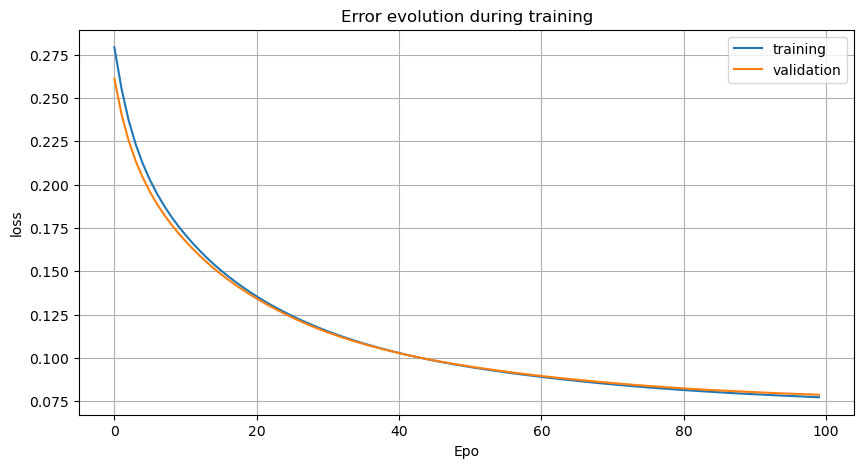

In [80]:
# visualize training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"],label = "training" )
plt.plot(history.history["val_loss"],label = "validation" )
plt.grid(True)
plt.xlabel('Epo')
plt.ylabel('loss')
plt.title('Error evolution during training')
plt.legend()
plt.show()

We have trained our neural network on the entire dataset and we can evaluate the performance of the network on the same dataset. A list of most hyperparameters available keras: 

https://keras.io/api/layers/initializers/

https://keras.io/api/layers/activations/

https://keras.io/api/losses/

https://keras.io/api/optimizers/